In [2]:
# Imports
import sympy as sp
import math

In [3]:
class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto

In [18]:
# Predefining sympy symbols
F, I, L, B, A, theta = sp.symbols('F I L B A theta')
muNot, r, Phi = sp.symbols('mu_0 r Phi')

# Magnetic Flux

Magnetic flux is a measure of the total magnetic field which passes perpendicularly through a given surface.  
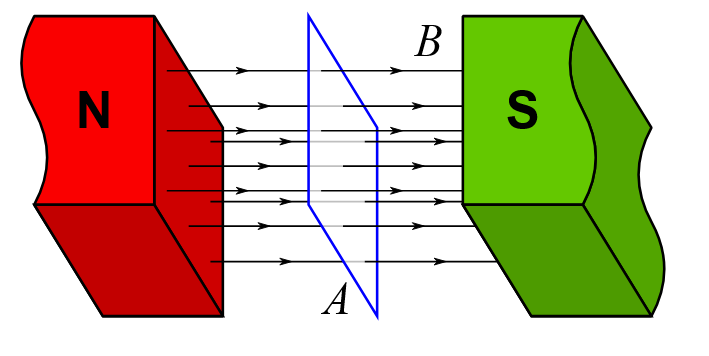

Only the magnetic field ($B$) that is perpendicular (normal) to the area ($A$) contributes to the magnetic flux ($\Phi_B$).

$$
\Phi_B = B \cdot A \cdot \cos\theta
$$

Where:
 - $\Phi_B$ : The magnetic flux measured in [[Webers]] ($Wb$)
 - $B$ : The magnetic field density measured in [[Teslas]] ($T$). Equivalent to $\frac{Wb}{m^2}$
 - $A$ : The area of the surface in $m^2$
 - $\theta$ : The angle between the surface normal and magnetic field line vectors (unit-less)

## Currents produce magnetic flux

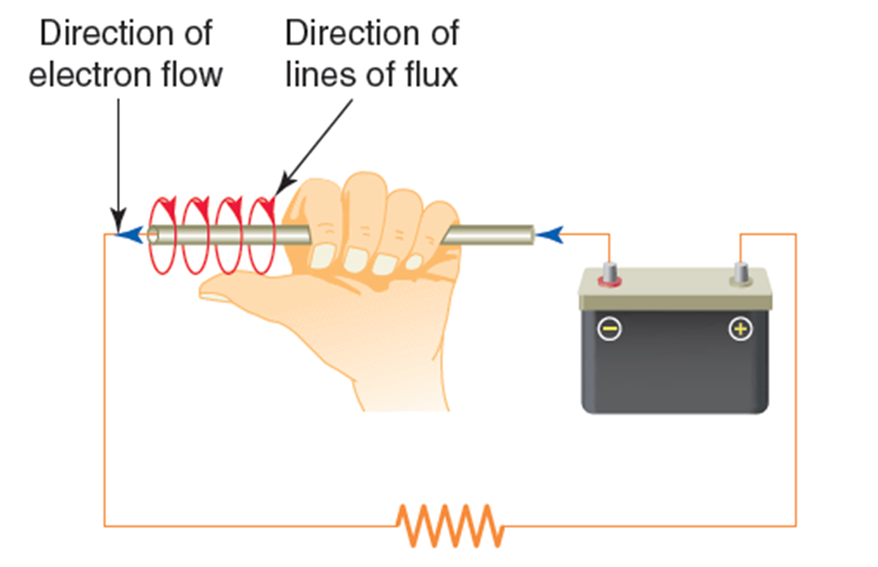

We can determine the strength of the flux at a given radius from the wire from Ampere's and Biot-Savart's Law:
$$ B = \frac{\mu_0 I}{2\pi r} $$
where:
- $B$ is the magnetic field strength (in teslas),
- $\mu_0$ is the permeability of free space $\left(4 \pi \times 10^{-7} \, \text{T} \cdot \text{m/A}\right)$,
- $I$ is the current through the wire (in amperes),
- $r$ is the radial distance from the wire (in meters).

In [27]:
muNot_value = 4e-7 * sp.pi #Tm/A
muNot_value

4.0e-7*pi

Magnetic flux $\Phi$ is related to the magnetic field and the area it passes through by:
$$
\Phi = B \cdot A \cdot \cos \theta
$$

For a circular loop of radius $r$ around the wire, the area is $A = \pi r^2$, and since the magnetic field is perpendicular to the plane of the loop, $\cos \theta = 1$.  
Substituting the expression for $B$:

$$
\Phi = \left( \frac{\mu_0 I}{2 \pi r} \right) \cdot (\pi r^2) = \frac{\mu_0 I r}{2}
$$

Thus, the magnetic flux through a circular loop of radius $r$ around the wire is:

$$
\Phi = \frac{\mu_0 I r}{2}
$$

where:
- $\Phi$ = flux density in Webers ($Wb$)

In [17]:
wire_B_field = muNot * I / (2 * sp.pi * r)
wire_B_field_equality =sp.Eq(B, wire_B_field)
wire_B_field_equality

Eq(B, I*mu_0/(2*pi*r))

In [23]:
area_circle = sp.pi*r**2
area_circle

pi*r**2

In [21]:
flux_density = B * A * sp.cos(theta)
flux_density_equality = sp.Eq(Phi, flux_density)
flux_density_equality

Eq(Phi, A*B*cos(theta))

In [25]:
flux_density_equality.subs({
    B: wire_B_field,
    A: area_circle,
    theta: 0
})

Eq(Phi, I*mu_0*r/2)

# Magnetic Force

When a charged particle moves in a magnetic field, it feels a force:

$$
F = qvB\sin\theta
$$

Where:
 - $F$ : Force in Newtons ($N$)
 - $q$ : Carge in Coulombs ($C$)
 - $v$ : Velocity of particle in $\frac{m}{s}$
 - $B$ : The magnetic field strength (density) in Teslas ($T$). Equivalent to $\frac{N s}{C m}$

Force is a vector. So is the magnetic field. So is the velocity of the particle. These three vectors are related to each other orthogonally using the right-hand rule:  
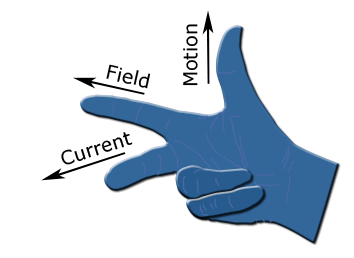


## Magnetic force on a wire

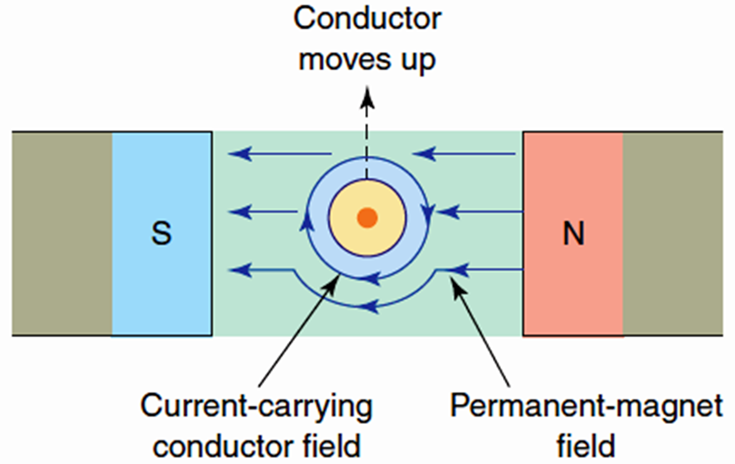

Let's expand the above principle and examine a scenario where instead of a single charged particle, we have a wire carrying current ($I$) through a magnetic field.

Current is a measure of charge over time ($\frac{q}{t}$), so it doesn't quite fit into our above equation. However, we can sort of force it by also multiplying velocity ($\frac{d}{t}$) by the same amount of time $t$ yielding: 

$$
F = \frac{q}{t} \cdot \left(\frac{d}{t} \cdot t\right) \cdot B \cdot \sin\theta
$$

We can express $\frac{q}{t}$ as $I$, representing current, and the time dimension cancels out leaving $d$ (distance), which we can express as the lenght of the wire $L$, yielding:

$$
F = ILB\sin\theta
$$

In [4]:
F, I, L, B, theta = sp.symbols('F I L B theta')

inductive_force = I*L*B*sp.sin(theta)
inductive_force

B*I*L*sin(theta)

In [8]:
inductive_force_equality = sp.Eq(F, inductive_force)
inductive_force_equality

Eq(F, B*I*L*sin(theta))

In [6]:
print(sp.latex(inductive_force, itex=True, mode='equation'))

$$B I L \sin{\left(\theta \right)}$$


## Magnetic Torque on a wire loop

So far we've learned that a particle moving through a magnetic field experiences a force perpendicular to its velocity.  
We've also learned that many particles moving through a wire exert the same force on that wire.

If the same wire passes through the magnetic field in both directions, it will experience a torque:
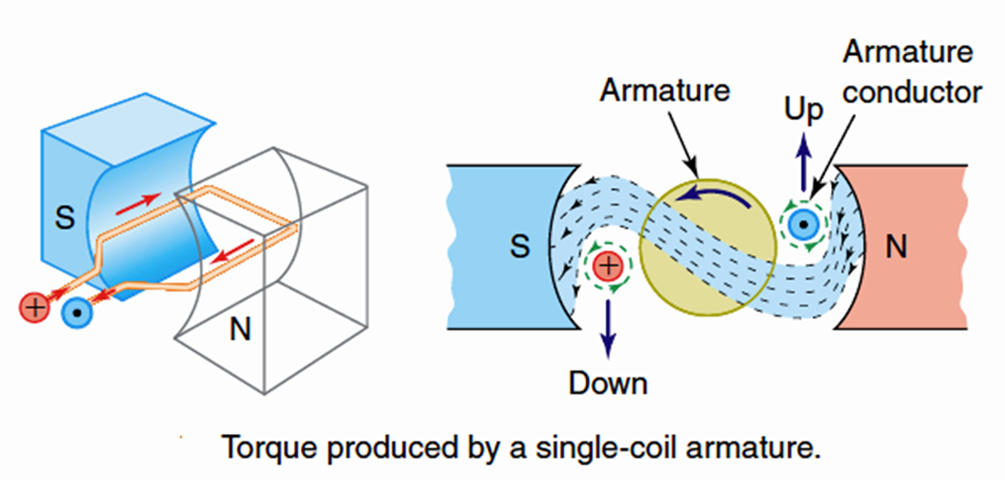

Let's examine a case of a simple square $0.5 m$ loop inside of a $ 0.25 T$ magnetic field carrying $10 A$ of current.  
For simplicity let's assume that the loop is oriented so that two sides are perpendicular ($90\deg$) to the B-field.

Two sides will experience $1.25 N$ of force (See code below), but because the current flow is opposite for each side, the forces will be in opposite directions, creating a torque along the midpoint axis.

In [7]:
## Example sympy substitution
inductive_force.subs({
    I: 10, #Amps
    B: 0.25, #Tesla
    L: 0.5, #Meters
    theta: math.radians(90)
}).evalf()

1.25000000000000

So how do we translate the two forces into torque ($\tau$)?

Let's assume that the masses are balanced and that the axis of rotation will be at the midpoint of the loop:  
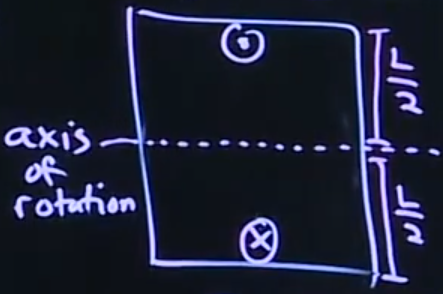  

Torque is just the perpendicular force applied to a lever arm, given mathematically as:
$$ \tau = F_\perp \cdot d $$

In this example there are two instances of torque, one from each of the active segments of the loop. Also, we know that the forces on each wire segment are perpendicular to the plane of the loop.  Therefore we can do the following:

$$ \begin{align*}
\tau &= 2 \left( F \cdot \frac{1}{2}L \right) \\
F = ILB \\
\tau &= 2 \left( ILB \cdot \frac{1}{2}L \right) \\
\tau &= 2 \left( \frac{IL^2B}{2} \right) \\
\tau &= IL^2B \\
L^2 = A \\
\tau &= IAB 
\end{align*}$$

Where:
 - $\tau$ = Torque in $Nm$
 - $A$ = Area of loop in $m^2$
 - $L$ = Length of segment in $m$
 - $F$ = Force in $N$
 - $B$ = Magnetic field in $T$
 - $I$ = Current in $A$